In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_tweets.csv")

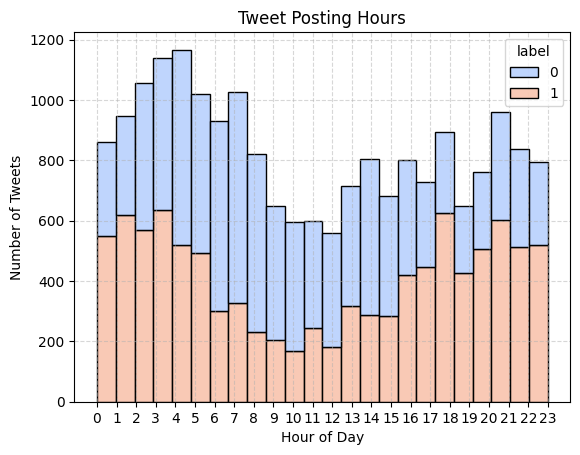

In [9]:
sns.histplot(data=df, x='hour', hue='label', bins=24, multiple='stack', palette='coolwarm')
plt.title('Tweet Posting Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

/var/folders/k6/q3_zm6pj0h7gwwqjdk1_t6cm0000gn/T/ipykernel_68755/847511957.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette=color)


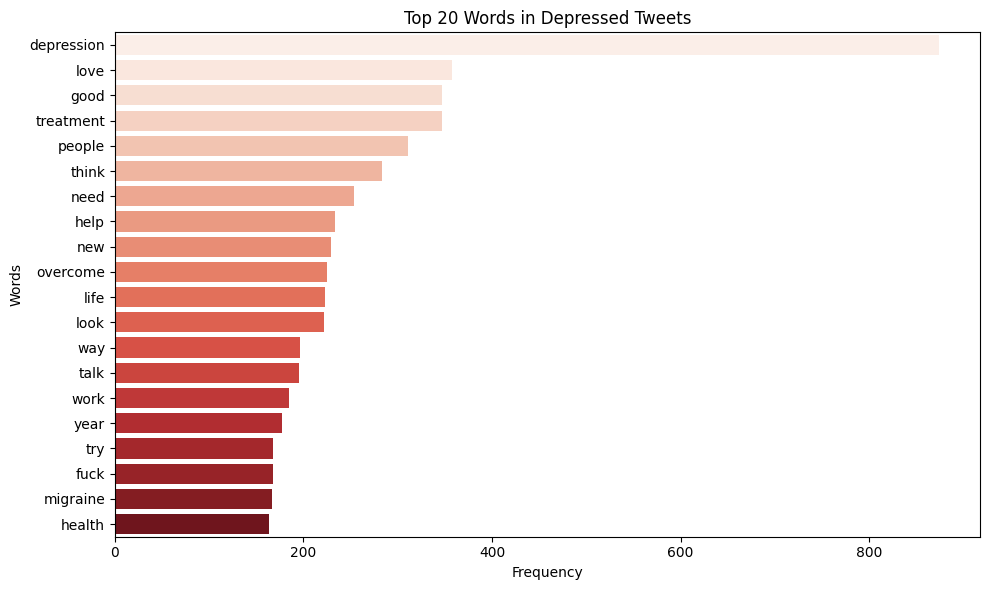

/var/folders/k6/q3_zm6pj0h7gwwqjdk1_t6cm0000gn/T/ipykernel_68755/847511957.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette=color)


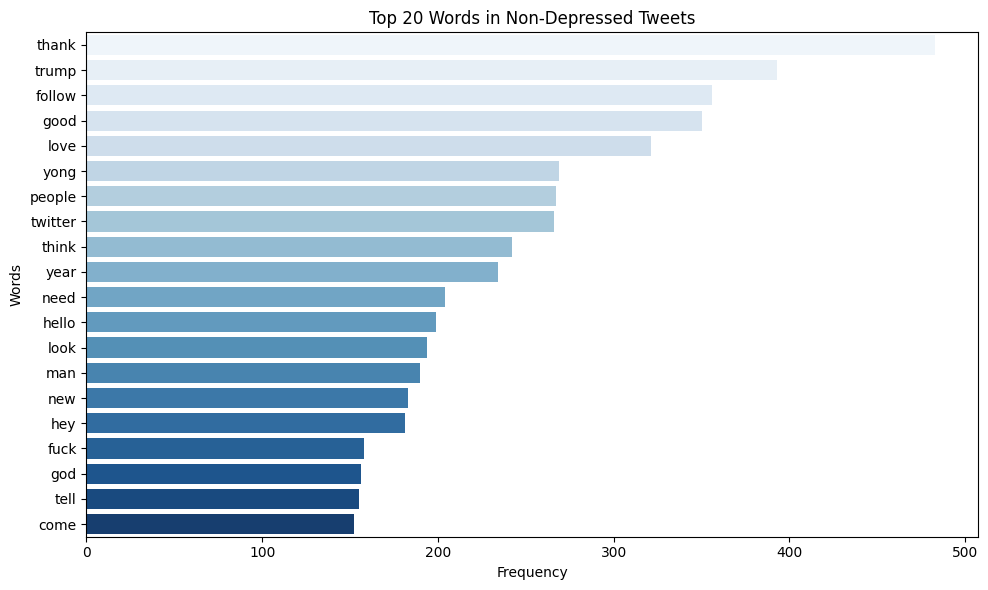

In [ ]:
from collections import Counter

depressed_tokens = " ".join(df[df['label'] == 1]['clean_text'].dropna()).split()
non_depressed_tokens = " ".join(df[df['label'] == 0]['clean_text'].dropna()).split()

def filter_tokens(tokens):
    return [t for t in tokens if t.lower() not in custom_stopwords and len(t) > 2]

def plot_top_words(tokens, label_name, color):
    filtered = filter_tokens(tokens)
    word_freq = Counter(filtered)
    common_words = word_freq.most_common(20)
    words, counts = zip(*common_words)
    
    sns.barplot(x=list(counts), y=list(words), palette=color)
    plt.title(f"Top 20 Words in {label_name} Tweets")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

plot_top_words(depressed_tokens, "Depressed", "Reds")
plot_top_words(non_depressed_tokens, "Non-Depressed", "Blues")


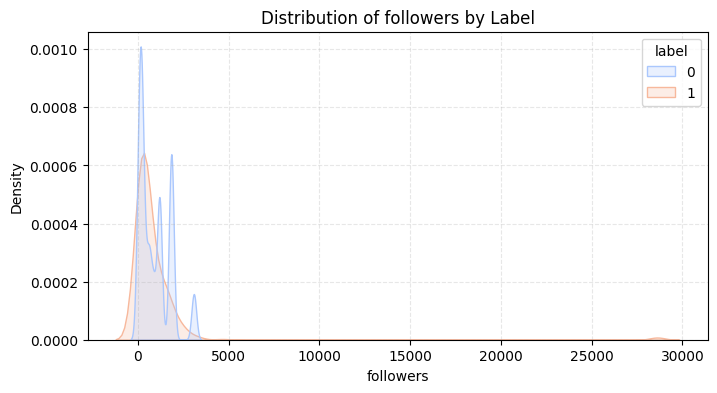

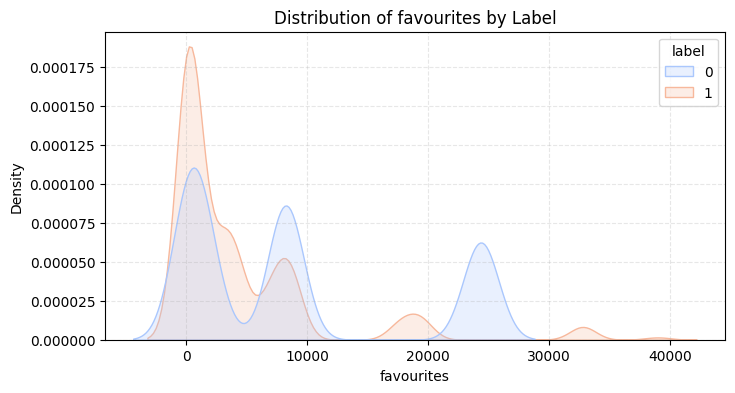

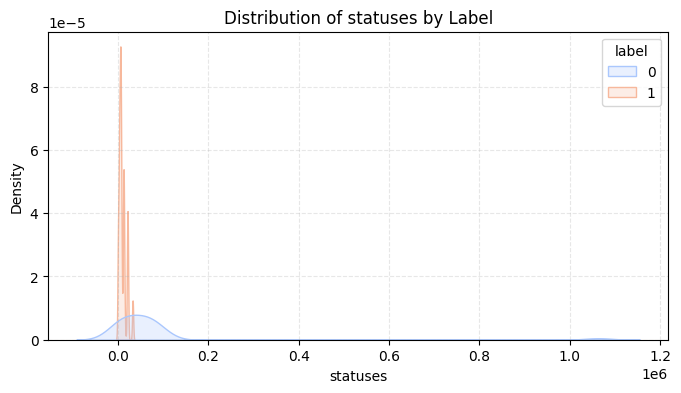

In [19]:
cols = ['followers', 'favourites', 'statuses']

for col in cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=col, hue='label', fill=True, common_norm=False, palette='coolwarm')
    plt.title(f'Distribution of {col} by Label')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()

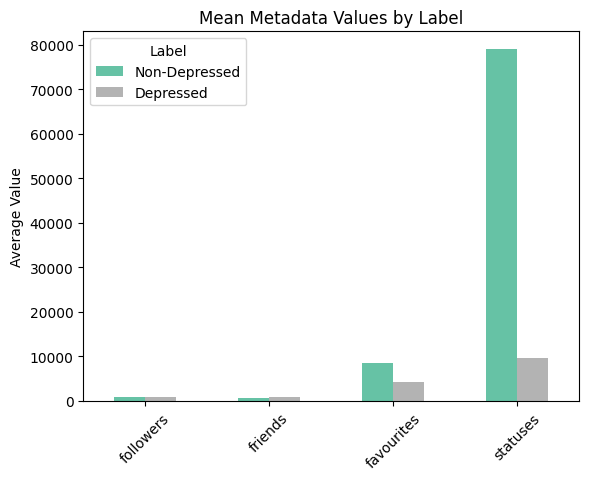

In [23]:
meta_cols = ['followers', 'friends', 'favourites', 'statuses']
mean_values = df.groupby('label')[meta_cols].mean().T

mean_values.plot(kind='bar', colormap='Set2')
plt.title('Mean Metadata Values by Label')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Label', labels=['Non-Depressed', 'Depressed'])
plt.show()
